# Trigger CPU Time Studies:



In [1]:
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet import ATLASLabel
from ROOT import TH1,TH1F, TH2F, TProfile,TCanvas, TFile, TPad, TColor
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow
import numpy as np
import math, ROOT
%config InlineBackend.figure_format = 'retina'
#%jsroot on
#%config InlineBackend.figure_format = 'svg'

Welcome to JupyROOT 6.23/01
Using all sub packages with ROOT dependence


In [2]:
from Gaugi.monet.AtlasStyle import SetAtlasStyle
SetAtlasStyle()


Applying ATLAS style settings...


In [26]:
# readin my samples
f_ringer    = TFile("../phd_data/time_studies/samples/ringer.root",'r')
f_noringer  = TFile("../phd_data/time_studies/samples/noringer.root",'r')

Info in <TCanvas::Print>: pdf file EgammaFex_TotalTime.pdf has been created


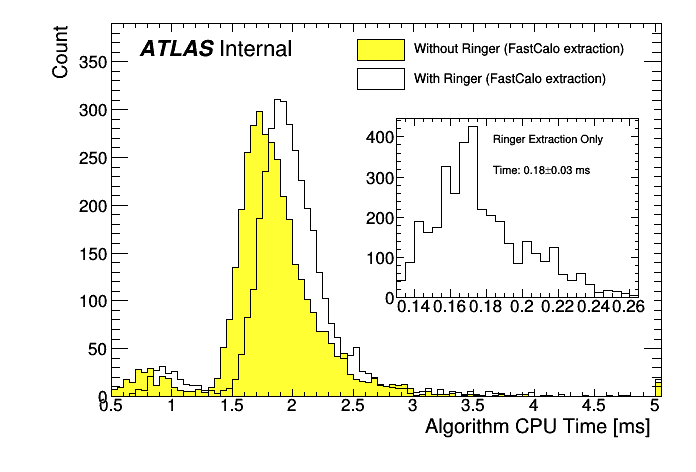

In [27]:
def plot_fex_totaltime():
    drawopt='hist'
    divide=''

    outcan = TCanvas( 'canvas', "", 700, 500 ) 
    h1 = f_noringer.Get("T2CaloEgamma_eGamma/Execute_Time")
    h2 = f_ringer.Get("T2CaloEgamma_Ringer/Execute_Time")
    h3 = f_ringer.Get("T2CaloEgamma_Ringer/RingerFex_Execute_Time")
    outcan.cd()
    h1.SetLineColor(kBlack)
    h1.SetFillColor(kYellow-4)
    #h1.SetFillColor(kRed-9)
    #h1.SetFillColor(kAzure-4)
    #h1.SetFillColor( TColor.GetColorTransparent(kAzure-4,.8))
    
    
    #h1.SetMarkerColor(kYellow-7)
    h1.SetMarkerColor(kRed-7)
    
    h2.SetLineColor(kBlack)
    h1.SetName('')
    h2.SetName('')
    h1.SetAxisRange(0.5,5.5,'X')
    h2.SetAxisRange(0.5,5.5,'X')
    h1.SetMaximum(390)
    h2.SetMaximum(390)
    AddHistogram(outcan,h1,drawopt=drawopt) 
    AddHistogram(outcan,h2,drawopt=drawopt) 
  
    bot = TPad("pad_bot", "This is the bottom pad",0.50,0.27,0.94,0.77)
    bot.SetBottomMargin(0.10/float(bot.GetHNDC()))
    bot.SetTopMargin   (0.02/float(bot.GetHNDC()))
    bot.SetRightMargin (0.05)
    bot.SetLeftMargin  (0.16)
    bot.SetFillColor(0)
    bot.Draw(drawopt)
    bot.cd()
    h3.SetAxisRange(0.13, 0.26,"X")
    h3.SetLineColor(kBlack)
    h3.SetLineWidth(1)
    h3.SetLineColor(kBlack)
    h3.SetFillColor(0)
    h3.GetXaxis().SetTitle('')
    h3.Draw()
  
    DrawText(bot,['Ringer Extraction Only', 'Time: %1.2f#pm%1.2f ms'%(h3.GetMean(),h3.GetStdDev())],.40,.68,.70,.93,totalentries=4)
    AddHistogram(bot,h3,drawopt=drawopt) 
    FormatCanvasAxes(bot, XLabelSize=18, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1.5)
  
    MakeLegend(outcan,.5,.80,.89,.99,option='F',textsize=14, names=['Without Ringer (FastCalo extraction)','With Ringer (FastCalo extraction)'], ncolumns=1, 
             squarebox=True, doFixLength=False)
  
    FormatCanvasAxes(outcan, XLabelSize=18, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1)
    SetAxisLabels(outcan,"Algorithm CPU Time [ms]",'Count')
    ATLASLabel(0.2,0.88,'Internal')
    outcan.Modified()
    outcan.Update()
    outcan.SaveAs("EgammaFex_TotalTime.pdf")
    outcan.Draw()

    
plot_fex_totaltime()

Info in <TCanvas::Print>: pdf file EgammaHypo_TotalTime.pdf has been created


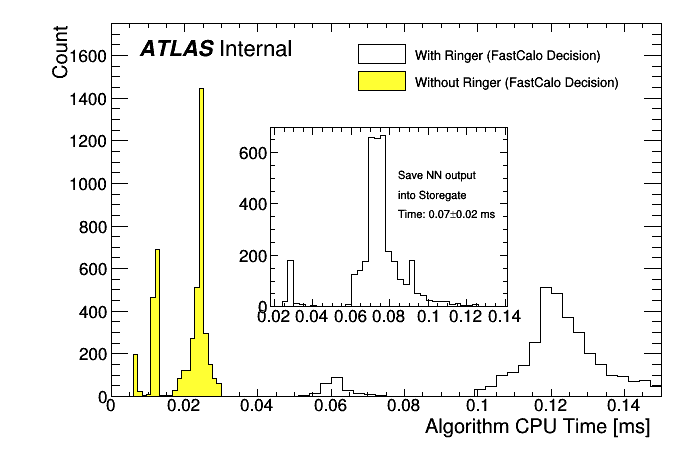

In [28]:
def plot_hypo_totaltime():
    drawopt='hist'
    divide=''
    outcan = TCanvas( 'canvas', "", 700, 500 ) 

    h1 = f_ringer.Get("TrigL2CaloRingerHypo_e26_lhtight/Execute_Time")
    h2 = f_ringer.Get("TrigL2CaloRingerFex_e26_lhtight/Execute_Time")
    h_noringer = f_noringer.Get("TrigL2CaloHypo_e26_lhtight/Execute_Time")

    # make shift
    offset = h1.FindBin( h1.GetMean() )
    offset = h2.FindBin(offset*h1.GetXaxis().GetXmax()/float(h1.GetNbinsX()))
    h_shift = TH1F('','', h2.GetNbinsX(), 0, h2.GetXaxis().GetXmax())
    for bin in range(h2.GetNbinsX()):
        h_shift.SetBinContent( bin+offset, h2.GetBinContent(bin) )
    h_ringer = h_shift
 

    outcan.cd()
    h_noringer.SetLineColor(kBlack)
    h_noringer.SetFillColor(kYellow-4)
    h_noringer.SetMarkerColor(kYellow-4)
    h_ringer.SetLineColor(kBlack)
    h_ringer.SetLineWidth(1)
    h_ringer.SetAxisRange(0,0.15,'X')
    h_noringer.SetAxisRange(0,0.15,'X')
    h_noringer.Rebin(2)
    h_ringer.SetMaximum(1750)
    h_noringer.SetMaximum(1750)
  
    AddHistogram(outcan,h_ringer,drawopt=drawopt) 
    AddHistogram(outcan,h_noringer,drawopt=drawopt) 

    h3 = f_ringer.Get('TrigL2CaloRingerFex_e26_lhtight/StoreOutput_Time')
    bot = TPad("pad_bot", "This is the bottom pad",0.32,0.25,0.75,0.75)
    bot.SetBottomMargin(0.10/float(bot.GetHNDC()))
    bot.SetTopMargin   (0.02/float(bot.GetHNDC()))
    bot.SetRightMargin (0.05)
    bot.SetLeftMargin  (0.16)
    bot.SetFillColor(0)
    bot.Draw(drawopt)
    bot.cd()
    h3.SetAxisRange(0.02, 0.14,"X")
    h3.SetLineColor(kBlack)
    h3.SetLineWidth(1)
    h3.SetLineColor(kBlack)
    h3.SetFillColor(0)
    h3.Draw()
    DrawText(bot,['Save NN output','into Storegate', 'Time: %1.2f#pm%1.2f ms'%(h3.GetMean(),h3.GetStdDev())],.55,.55,.70,.8,totalentries=4)
    AddHistogram(bot,h3,drawopt=drawopt) 
    FormatCanvasAxes(bot, XLabelSize=18, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1.5)
    MakeLegend(outcan,.50,.80,.89,.97,option='F',textsize=14, names=['With Ringer (FastCalo Decision)',
                'Without Ringer (FastCalo Decision)'], ncolumns=1, squarebox=False, doFixLength=False)
 
  
    FormatCanvasAxes(outcan, XLabelSize=18, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1)
    SetAxisLabels(outcan,"Algorithm CPU Time [ms]",'Count')
    ATLASLabel(0.2,0.88,'Internal')
    outcan.Modified()
    outcan.Update()
    outcan.Draw()
    outcan.SaveAs("EgammaHypo_TotalTime.pdf")

plot_hypo_totaltime()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::SaveSource>: C++ Macro file: plot_chain_summary.C has been generated
Info in <TCanvas::Print>: pdf file plot_chain_summary.pdf has been created


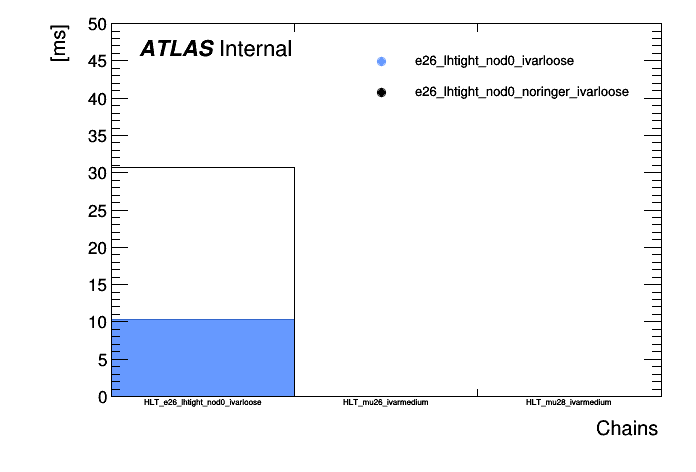

In [7]:
def plot_primary_trigger_time_summary():

    drawopt='hist'
    divide=''
    h1 = f_ringer.Get("TIMERS/TrigSteer_HLT_Chains_runsummary")
    h2 = f_noringer.Get("TIMERS/TrigSteer_HLT_Chains_runsummary")

    outcan = TCanvas( 'canvas', "", 700, 500 ) 
    h1.SetLineColor(kAzure-5)
    h1.SetFillColor(kAzure-4)
    h1.SetMarkerColor(kAzure-4)
    h2.SetLineColor(kBlack)
  
    outcan.SaveAs( "plot_chain_summary.C" )
    h1.SetMaximum(50)
    h1.SetAxisRange(0,2,'X')
    h2.SetAxisRange(0,2,'X')
    h1.SetAxisRange(0,50,'Y')
    h2.SetAxisRange(0,50,'Y')
    AddHistogram(outcan,h1,drawopt=drawopt) 
    AddHistogram(outcan,h2,drawopt=drawopt) 

    ATLASLabel(0.2,0.88,'Internal')
    outcan.Modified()
    outcan.Update()
    outcan.Draw()
    MakeLegend(outcan,.50,.77,.89,.97,option='p',textsize=14, names=['e26_lhtight_nod0_ivarloose',
            'e26_lhtight_nod0_noringer_ivarloose'], ncolumns=1, squarebox=False, doFixLength=False)
  
    FormatCanvasAxes(outcan, XLabelSize=9, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1)
    SetAxisLabels(outcan,"Chains",'[ms]')
  
    outcan.SaveAs("plot_chain_summary.pdf")
    outcan.Draw()

plot_primary_trigger_time_summary()